### Workplace Set Up 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import nltk

from nltk.corpus import stopwords
!pip install --upgrade gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import LdaModel, CoherenceModel
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Nmf
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from operator import itemgetter

nltk.download('stopwords')


from nltk.stem.wordnet import WordNetLemmatizer
import spacy

from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install little-mallet-wrapper
import little_mallet_wrapper as lmw

In [3]:
!pip install spacy
from nltk.corpus import stopwords


!pip install pyLDAvis
!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Cleaning and Preprocessing


In [4]:
bey = pd.read_csv('no_headers.csv')

In [5]:
bey


song  year                                             lyrics
0      Summertime  2003  out of all the guys that approached me walkin ...
1   My First Time  2003  verse 1  all in all you ve been there for me y...
2   Crazy in Love  2003  intro  jay z   beyoncÃ©  yes   whoo  ow   so c...
3    Naughty Girl  2003  i love to love you  baby i love to love you  b...
4        Baby Boy  2003  intro  sean paul  certified quality a dat di g...
..            ...   ...                                                ...
81      otherside  2020  verse 1  beyoncÃ©  if the storm comes if we bu...
82       my power  2020  chorus  nija   beyoncÃ©  they ll never take my...
83           scar  2020  verse 1  070 shake  i wonder how and why it we...
84   black parade  2020  verse 1  i m goin  back to the south i m goin ...
85         spirit  2020  intro  uishi kwa muda mrefu mfalme  uishi kwa ...

[86 rows x 3 columns]

In [6]:
bey_prelem = bey[bey['year'] <= 2016]
bey_postlem = bey[bey['year'] > 2016]

In [7]:
bey_prelem

song  ...                                             lyrics
0                      Summertime  ...  out of all the guys that approached me walkin ...
1                   My First Time  ...  verse 1  all in all you ve been there for me y...
2                   Crazy in Love  ...  intro  jay z   beyoncÃ©  yes   whoo  ow   so c...
3                    Naughty Girl  ...  i love to love you  baby i love to love you  b...
4                        Baby Boy  ...  intro  sean paul  certified quality a dat di g...
5                    Hip Hop Star  ...  intro  big boi  pure players pure players   ve...
6                     Be With You  ...  intro  ohh  baby ohh  baby   verse 1  i love t...
7                Me, Myself and I  ...  intro  all the ladies  if you feel me  help me...
8                             Yes  ...  intro  uh huh  uh huh  uh huh uh huh  uh huh  ...
9                           Signs  ...  intro  beyoncÃ©  in december  every sign has i...
10                     Speechless  ...  chorus  you ve got me  you ve got me  you ve g...
11         That's How You Like It  ...  that s how you like it  huh that s how you lik...
12        The Closer I Get to You  ...  verse 1  luther vandross    beyoncÃ©   the clo...
13            Dangerously in Love  ...  verse 1  baby  i love you you are my life my h...
14              Beyonce Interlude  ...  i believe that harmonies are colors every time...
15                Gift from Virgo  ...  intro  a gift from virgo   verse 1  i wish i c...
16                          Daddy  ...  verse 1  i remember when you use to take me on...
17                    Work it Out  ...  how you doing honey baby  you know i don t ask...
18           I Can't Take No More  ...  it s really been weighing on me tell me what d...
19             What's It Gonna Be  ...  hey you what s the deal  it s poppin  up in he...
20                 Beautiful Liar  ...  intro  beyoncÃ©  ay  ay  ay nobody likes being...
21                  Irreplaceable  ...  to the left  to the left to the left  to the l...
22                    Green Light  ...  intro  give it to mama give it  give it give i...
23                      Kitty Kat  ...  chorus  you know i hate sleeping alone but you...
24           Welcome to Hollywood  ...  intro  jay z    beyoncÃ©   it ain t for everyb...
25                      Upgrade U  ...  intro  jay z    beyoncÃ©   he he he    yeah  b...
26                  Flaws and All  ...  i m a trainwreck in the morning i m a bitch in...
27                             If  ...  verse 1  he s always laughing and flirting wit...
28                  Get Me Bodied  ...  verse 2  mission five  skip to the front of th...
29                  Freakum Dress  ...  intro  to be or not to be    not  hold up  bri...
30                     Suga Mamma  ...  suga mama  intro  damn  that was so good i wan...
31                      dÃ©jÃ  vu  ...  intro  beyoncÃ©   jay z  bass  uh  hi hat  uh ...
32                 Ring the Alarm  ...  verse 1  tell me how should i feel when i know...
33                     Resentment  ...  verse 1  i wish i could believe you  then i d ...
34                         Listen  ...   pre chorus  oh  i m screamin  out and my drea...
35               World Wide Woman  ...  verse 2  if it s like a mac you own maximize t...
36                    Check on It  ...  verse 1  slim thug  you need to stop playing  ...
37                         Creole  ...  verse 1  baby  i see you  that look in your ey...
38                If I were a boy  ...   chorus  if i were a boy i think i could under...
39                           Halo  ...  verse 1  remember those walls i built  well  b...
40                      Disappear  ...  verse 1  if i begged and if i cried would it c...
41            Broken-Hearted Girl  ...  erse 1  you re everything i thought you never ...
42                      Ave Maria  ...  verse 1  she was lost in so many different way...
43                 Smash into You  ...  verse 1  head down as i watch

In [8]:
bey_postlem

song  ...                                             lyrics
59      pray you catch me  ...  you can taste the dishonesty it s all over you...
60                hold up  ...  chorus  hold up  they don t love you like i lo...
61  donâ€™t hurt yourself  ...  intro  beyoncÃ©  oh na na na oh na na na oh na...
62                  sorry  ...  chorus  sorry  i ain t sorry sorry  i ain t so...
63                 6 inch  ...  chorus  beyoncÃ©  six inch heels  she walked i...
64          daddy lessons  ...  intro  yee haw ooh texas  texas  ooh  texas   ...
65           love drought  ...  verse 1  ten times out of nine  i know you re ...
66            sandcastles  ...  verse 1  we built sandcastles that washed away...
67                forward  ...   verse  james blake  james blake   beyoncÃ©  f...
68                freedom  ...  verse 1  beyoncÃ©  tryna rain  tryna rain on t...
69              all night  ...  verse 1  i found the truth beneath your lies a...
70              formation  ...  verse 1  y all haters corny with that illumina...
71                 bigger  ...  if you feel insignificant you better think aga...
72     find your way back  ...  verse 1  beyoncÃ©  daddy used to take me walki...
73     donâ€™t jealous me  ...  verse 1  tekno  ah ha suzuki no be chang jiang...
74               ja ara e  ...  ehe  ko juba  ko juba  ehe  ko juba  ko juba  ...
75                   nile  ...  chorus  kendrick lamar   beyoncÃ©  kendrick la...
76             mood 4 eva  ...  verse 1  beyoncÃ©  i know my enemy prey on me ...
77                  water  ...  chorus  salatiel  baby  oh  i m not much of a ...
78        brown skin girl  ...  brown skin girl your skin just like pearls the...
79    keys to the kingdom  ...  see how the sun and the moon bow for you  but ...
80                already  ...  long live the king  you a king  you know it ki...
81              otherside  ...  verse 1  beyoncÃ©  if the storm comes if we bu...
82               my power  ...  chorus  nija   beyoncÃ©  they ll never take my...
83                   scar  ...  verse 1  070 shake  i wonder how and why it we...
84           black parade  ...  verse 1  i m goin  back to the south i m goin ...
85                 spirit  ...  intro  uishi kwa muda mrefu mfalme  uishi kwa ...

[27 rows x 3 columns]

### Exploratory Analysis 


In [73]:
bey['num_words'] = bey['lyrics'].map(lambda x: x.split()).str.len()

In [79]:
bey.head()

song  ...  num_words
0     Summertime  ...        516
1  My First Time  ...        267
2  Crazy in Love  ...        929
3   Naughty Girl  ...        117
4       Baby Boy  ...        907

[5 rows x 4 columns]

In [74]:
display(bey['num_words'].describe())


count     86.000000
mean     409.593023
std      245.879472
min       37.000000
25%      179.000000
50%      405.000000
75%      587.500000
max      982.000000
Name: num_words, dtype: float64

In [ ]:
bey_prelem['num_words'] = bey_prelem['lyrics'].map(lambda x: x.split()).str.len()
display(bey_prelem['num_words'].describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count     59.000000
mean     438.593220
std      258.655617
min       37.000000
25%      182.000000
50%      468.000000
75%      591.000000
max      982.000000
Name: num_words, dtype: float64

In [ ]:
bey_postlem['num_words'] = bey_postlem['lyrics'].map(lambda x: x.split()).str.len()
display(bey_postlem['num_words'].describe())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count     27.000000
mean     346.222222
std      205.727103
min       84.000000
25%      179.500000
50%      288.000000
75%      485.500000
max      775.000000
Name: num_words, dtype: float64

In [ ]:
bey_postlem.groupby('year')

bey_prelem.groupby('year')

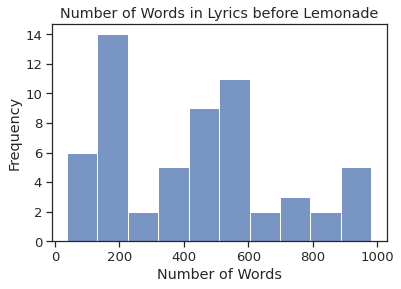

In [ ]:
sns.histplot(data= bey_prelem['num_words'], bins= 10, palette="Yellow")
plt.title('Number of Words in Lyrics before Lemonade')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.show()



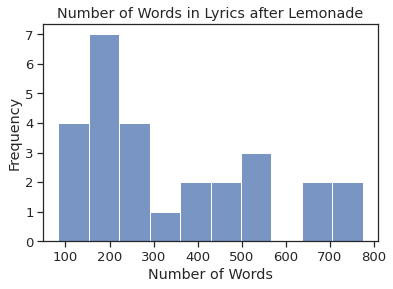

In [ ]:
sns.histplot(data= bey_postlem['num_words'], bins= 10, palette="Yellow")
plt.title('Number of Words in Lyrics after Lemonade')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



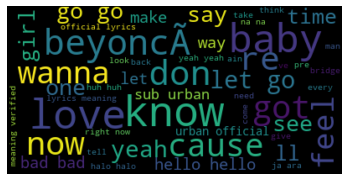

In [ ]:
text = " ".join(lyrics for lyrics in bey.lyrics)

stopwords = set(STOPWORDS)
stopwords.update(["chorus", "verse", "oh", "feat", "paramour", "aurora"])

wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

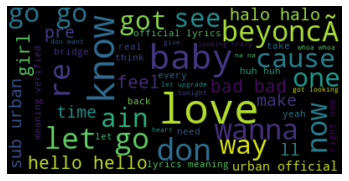

In [ ]:
text = " ".join(lyrics for lyrics in bey_prelem.lyrics)

stopwords = set(STOPWORDS)
stopwords.update(["chorus", "verse", "oh", "feat", "paramour", "aurora"])

wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1]:
text = " ".join(lyrics for lyrics in bey_postlem.lyrics)

stopwords = set(STOPWORDS)
stopwords.update(["chorus", "verse", "oh", "feat", "paramour", "aurora", "beyonce"])

wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: ignored